y0= [1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82
 1.84 1.86 1.88 1.9  1.92 1.94 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1
 2.12 2.14 2.16 2.18 2.2  2.22 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38
 2.4  2.42 2.44 2.46 2.48 2.5  2.52 2.54 2.56 2.58 2.6  2.62 2.64 2.66
 2.68 2.7  2.72 2.74 2.76 2.78 2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94
 2.96 2.98 3.  ]
y0=  1.0 
y100=  3.0


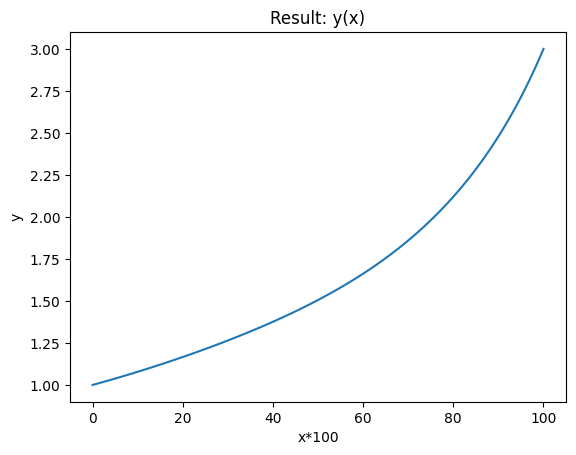

In [2]:
import numpy as np
from array import *
import matplotlib.pyplot as plt

def newton_method(y0, h, eps):
    n = len(y0)
    n2 = n - 2
    b = np.array([0.0 for j in range(n2)])
    dy = np.array([0.0 for j in range(n2)])
    a = np.array([[0.0 for j in range(n2)] for i in range(n2)])
	
    y = y0.copy()
    
    maxdy = 1.0
    
    while maxdy > eps:
        fi = f(y, h)
        w = Yakobi(y, h)
        for i in range(1, n - 1):
            b[i - 1] = -fi[i]
            for j in range(1, n - 1):
                a[i - 1, j - 1] = w[i, j]
        # print("this is A", a)
        # print("this is B", b)
        dy = gauss_method(a, b)
        
        for i in range(1, n - 1):
            y[i] = y[i] + dy[i - 1]
            
        m = len(dy)
        maxdy = 0.0
        for i in range(0, m):
            if abs(dy[i]) > maxdy:
                maxdy = abs(dy[i])
    
    return y
	
	
def f(y, h):
    n = len(y)
    fi = np.array([0.0 for j in range(n)])
    x = 0
    for i in range(1, n - 1):
        x = i * h
        fi[i] = (y[i - 1]- 2 * y[i] + y[i + 1]) / h / h - y[i]**3 - x**2
        
    return fi	
	
	
def Yakobi(y, h):
    n = len(y)
    w = np.array([[0.0 for j in range(n)] for i in range(n)])
    for i in range(1, n - 1):
        for j in range(1, n - 1):
            w[i, j] = 0.0
            if i == j:
                w[i, j] = -2.0 / h / h - 3 * y[i] * y[i]
            if j == i - 1 or j == i + 1:
                w[i, j] = 1.0 / h / h
    # print("First Matrix \n >> ", w)
    return w				
	
def gauss_method(a,b):
    n = len(b)
    for k in range(0, n - 1):
        for i in range(k + 1, n):
            if a[i,k] != 0.0:
                lam = a [i, k] / a[k, k]
        a[i, k + 1:n] = a[i, k + 1:n] - lam * a[k, k + 1:n]
        b[i] = b[i] - lam * b[k]
    for k in range(n - 1, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k + 1:n], b[k + 1:n])) / a[k, k]
    return b

def fast_gauss(y, h, N, eps, u_left, u_right) :
    f = zeros(N-1)
    
    fi[0] = (u_left - 2 * y[i] + y[i + 1]) / h / h - y[0]**3 - x**2
    for n in range(1,N-2):
        x = i * n
        fi[i] = (y[i - 1]- 2 * y[i] + y[i + 1]) / h / h - y[i]**3 - x**2
    fi[N - 2] = (y[N - 1] - 2 * y[N - 2] + u_right) / h / h - y[N - 2]**3 - x**2
    
    return f

eps = 0.0001

n = 100
h = 1.0 / n	

y0 = np.array([0.0 for j in range(n + 1)])

#y0=np.array([1.0,2.0,3.0])

for k in range(0, n + 1):
    y0[k]= 1.0 + 2.0 * k / n

print("y0=",y0)
print("y0= ", y0[0], "\ny100= ", y0[n])    
y = newton_method(y0, h, eps)	
# print(y)

plt.plot(y)
plt.title('Result: y(x)')
plt.xlabel('x*100')
plt.ylabel('y')
plt.show()

